# **Introduction to Equation Solving & Optimization in Python**

Python provides powerful tools and libraries for solving various types of equations, ranging from simple systems of linear equations to more complex polynomial and non-linear equations. This introduction will guide you through the basics of solving these equations using Python.

## 1. **Solving Systems of Linear Equations**

A system of linear equations can be represented in matrix form as $Ax = b$, where:

- $A$ is a matrix of coefficients,
- $x$ is a vector of unknowns,
- $b$ is a vector of constants.

In Python, you can solve such systems using the `numpy` library:

In [1]:
import numpy as np

# Coefficient matrix A
A = np.array([[3, 1], [1, 2]])

# Constant vector b
b = np.array([9, 8])

# Solving for x
x = np.linalg.solve(A, b)

print(x)

[2. 3.]


**Exercises:**

1. Write a function `fit` taking in a np.array `y` and a matrix `X` of conformable dimensions ($X\in \mathbb{R}^{n\times k}$), such that it calculates the OLS estimator $\hat{\beta}(X)$, as well as the residual vector $\epsilon$. Do not solve the normal equations with a matrix inverse, but use `np.linalg.solve`.
2. Write a function `robust` which calculates the sandwich estimator: 
   
$$n\text{Var}(\hat{\beta})_{\text{robust}} = (X'X)^{-1} \left( \sum_{i=1}^n X_i' \hat{\epsilon}_i^2 X_i \right) (X'X)^{-1}$$

3. Write a `class` called `olsmodel` which holds `y` and `X`, and which contains methods `fit`, `robust` and `predict`

In [55]:
import numpy as np
# Define initial parameters
n = 1000 # sample size
K = 2 # number of variables and coefficients
sigma = 1 # standard deviation of error term
X = np.random.uniform(-10, 10, (n, K - 1)) # generate random X
X = np.column_stack((np.ones(n), X)) # add constant
beta = np.random.uniform(-5, 5, K) # generate random true beta
eps = np.random.normal(0, sigma, n) # generate random errors (disturbances)

# Generate true y
y = np.dot(X, beta) + eps

def fit(y, X):    
    # Solve for OLS coefficients
    b_ols = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    b_ols_test = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    y_hat = X.dot(b_ols)
    e = y - y_hat
    return b_ols, b_ols_test

fit(y, X)

print(y.shape)
print(X.shape)




(1000,)
(1000, 2)


In [56]:
import numpy as np

def fit(y, X):
    """
    Calculate the OLS estimator β_hat and the residuals ε.
    
    Parameters:
    y (np.array): Dependent variable vector of shape (n, 1).
    X (np.array): Independent variable matrix of shape (n, p).
    
    Returns:
    β_hat (np.array): OLS estimator of shape (p, 1).
    residuals (np.array): Residual vector of shape (n, 1).
    """
    # Calculate X'X and X'y
    XtX = X.T @ X
    Xty = X.T @ y
    
    # Solve for β_hat: β_hat = (X'X)^{-1} X'y
    β_hat = np.linalg.solve(XtX, Xty)
    
    # Calculate residuals: ε = y - Xβ_hat
    residuals = y - X @ β_hat
    residuals = residuals.reshape(residuals.shape[0], 1)
    print(residuals.shape)
    
    return β_hat, residuals

def robust(y, X):
    """
    Calculate the robust sandwich estimator of the variance of β_hat.
    
    Parameters:
    y (np.array): Dependent variable vector of shape (n, 1).
    X (np.array): Independent variable matrix of shape (n, p).
    
    Returns:
    var_beta_robust (np.array): Robust sandwich estimator of shape (p, p).
    """
    β_hat, residuals = fit(y, X)
    
    # Calculate X'X
    XtX = X.T @ X
    
    # Calculate the middle term: sum(X_i' * ε_i^2 * X_i)
    middle_term = np.zeros((X.shape[1], X.shape[1]))
    for i in range(X.shape[0]):
        Xi = X[i:i+1, :]  # X_i is the i-th row of X
        εi = residuals[i]  # ε_i is the i-th residual
        middle_term += Xi.T @ Xi * εi**2
    
    # Calculate the robust variance: (X'X)^{-1} * middle_term * (X'X)^{-1}
    var_beta_robust = np.linalg.inv(XtX) @ middle_term @ np.linalg.inv(XtX)
    
    return var_beta_robust

class olsmodel:
    def __init__(self, y, X):
        """
        Initialize the olsmodel class with y and X.
        
        Parameters:
        y (np.array): Dependent variable vector of shape (n, 1).
        X (np.array): Independent variable matrix of shape (n, p).
        """
        self.y = y
        self.X = X
        self.β_hat = None
        self.residuals = None
    
    def fit(self):
        """
        Fit the model by calculating the OLS estimator and residuals.
        """
        self.β_hat, self.residuals = fit(self.y, self.X)
    
    def robust(self):
        """
        Calculate the robust sandwich estimator of the variance of β_hat.
        
        Returns:
        var_beta_robust (np.array): Robust sandwich estimator of shape (p, p).
        """
        return robust(self.y, self.X)
    
    def predict(self, X_new):
        """
        Predict new values given a new matrix X_new using the estimated β_hat.
        
        Parameters:
        X_new (np.array): New independent variable matrix of shape (m, p).
        
        Returns:
        y_pred (np.array): Predicted values of shape (m, 1).
        """
        if self.β_hat is None:
            raise ValueError("Model is not fitted yet. Call the fit() method first.")
        
        return X_new @ self.β_hat

# # Example usage
# if __name__ == "__main__":
#     # Example data
#     y = np.array([[1], [2], [3], [4]])
#     X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])

#     # Instantiate and fit the model
#     model = olsmodel(y, X)
#     model.fit()

#     # Get the OLS estimator and residuals
#     print("OLS estimator (β_hat):")
#     print(model.β_hat)

#     # Get the robust variance estimator
#     print("Robust variance estimator:")
#     print(model.robust())

#     # Predict new values
#     X_new = np.array([[1, 5], [1, 6]])
#     print("Predictions:")
#     print(model.predict(X_new))


In [57]:
def robust_test(y, X):
    """
    Calculate the robust sandwich estimator of the variance of β_hat using vectorized operations.
    
    Parameters:
    y (np.array): Dependent variable vector of shape (n, 1).
    X (np.array): Independent variable matrix of shape (n, p).
    
    Returns:
    var_beta_robust (np.array): Robust sandwich estimator of shape (p, p).
    """
    β_hat, residuals = fit(y, X)
    
    # Calculate X'X
    XtX = X.T @ X
    
    # Calculate the middle term using vectorized operations
    # We compute the element-wise product of the residuals squared and the rows of X
    # Then, we sum over all observations to get the final middle_term matrix
    middle_term = (X.T * residuals.T) @ (X * residuals)
    middle_term = (X.T * residuals.T) @ (X * residuals)
    
    
    # Calculate the robust variance: (X'X)^{-1} * middle_term * (X'X)^{-1}
    var_beta_robust = np.linalg.inv(XtX) @ middle_term @ np.linalg.inv(XtX)
    
    return var_beta_robust

print(robust_test(y, X))
print(robust(y, X))

(1000, 1)
[[1.07033103e-03 3.30215894e-05]
 [3.30215894e-05 3.17367463e-05]]
(1000, 1)
[[1.07033103e-03 3.30215894e-05]
 [3.30215894e-05 3.17367463e-05]]


In [59]:
import statsmodels.api as sm
# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the robust covariance matrix (sandwich estimator)
robust_cov = results.get_robustcov_results(cov_type='HC0').cov_params()

# Print results
print("OLS estimator (β_hat):")
print(results.params)

print("Robust covariance matrix:")
print(robust_cov)


OLS estimator (β_hat):
[-4.90071145 -4.50933829]
Robust covariance matrix:


**Solution**

In [ ]:
def sim_some_data(size, ncov):
    X = np.random.normal(size=(size, ncov))
    beta = np.random.randint(-5,5, size = ncov)
    X[:, 0] = 1
    y = X @ beta + np.random.normal(loc=0, scale=ncov, size=size) 
    return y, X, beta 

y, X, beta = sim_some_data(100_000, 100)

def fit(y, X):
    beta_hat = np.linalg.solve( X.T @ X, X.T @ y )
    resid = y - X @ beta_hat
    return beta_hat, resid

beta_hat, resid = fit(y, X)

# import matplotlib.pyplot as plt
# plt.scatter(beta, beta_hat)
# plt.title("Coefficient plot")
# plt.xlabel(r"$\beta$")
# plt.ylabel(r"$\hat \beta$")
# plt.show()

In [ ]:
from numba import njit

@njit
def robust(X, resid):
    k = X.shape[1]
    n = X.shape[0]
    sum = np.zeros((k, k))
    for i in range(n): # we prefer using a loop over using residuals on a diagonal matrix, so we don't have to instantiate a NxN matrix 
        sum = sum + np.outer(X[i, :],  X[i, :]) * (resid[i]**2)

    XpX_inv = np.linalg.inv(X.T @ X)

    sw = (XpX_inv @ sum @ XpX_inv)
    return sw

_ = robust(X, resid)

## Or an alternative version using no matrix inversion:
@njit
def robust_linalg(X, resid):
    k = X.shape[1]
    n = X.shape[0]
    sum = np.zeros((k, k))
    for i in range(n): # we prefer using a loop over using residuals on a diagonal matrix, so we don't have to instantiate a NxN matrix 
        sum = sum + np.outer(X[i, :],  X[i, :]) * (resid[i]**2)

    XpX = X.T @ X

    # steps:
    # XpX @ sw @ XpX = sum
    sw_XpX = np.linalg.solve(XpX , sum)

    # steps:
    # sw @ XpX = sw_XpX
    # XpX.T @ sw.T = sw_XpX.T
    sw_T = np.linalg.solve(XpX.T, sw_XpX.T) # transpose of sandwich sw (but sw is diagonal)

    return sw_T

_ = robust_linalg(X, resid) # compile function and throw result away

In [ ]:
%timeit robust(X, resid)
%timeit robust_linalg(X, resid)

## 2. **Finding Roots of Polynomial Equations**

For polynomial equations, Python’s `numpy` library offers straightforward methods to find roots. For example, to solve a polynomial equation like $ax^2 + bx + c = 0$. 
This code computes the roots of the quadratic equation $x^2 - 3x + 2 = 0$, which are the values of $x$ that satisfy the equation.


In [2]:
coefficients = [1, -3, 2]  # Coefficients of x^2 - 3x + 2
roots = np.roots(coefficients)

print(roots)

[2. 1.]


**Exercise:** Write a function `IRR` to calculate the internal rate of return of a payment stream. The function takes as arguments a stream of future payments $x_1,...,x_n$ and an initial payment $C_0$, and finds the roots of the equation $$ C_0 = \sum_i x_i (1+r)^{-i}.$$
It then checks which of the roots $\{r_1,...,r_n\}$ are real, and picks among those the internal rate of return. Does the function work well for large $n$?

In [ ]:
C_0 = 100  # Initial investment
x = np.array([20, 26, 40, 55])  # Cash flows, the last payment comes last in this sequence

def IRR(C_0, x):
    # Reverse the cash flows array to match the polynomial root finding convention
    x = np.flip(x)
    
    # Create the coefficients array for the polynomial equation
    coefficients = np.concatenate([x, [-C_0]])
    
    # Find the roots of the polynomial equation
    roots = np.roots(coefficients)
    
    # Filter out the complex roots, keep only real roots
    is_real_solution = np.real(roots) == roots
    roots = roots[is_real_solution]
    roots = np.real(roots)
    
    # Calculate IRR candidates from the real roots
    IRR_candidates = roots**(-1) - 1
    
    # Filter out IRR candidates that are greater than -1
    IRR = IRR_candidates[IRR_candidates > -1]
    
    # Return the IRR if there is a unique solution, otherwise print a message
    if IRR.size == 1:
        return IRR[0]
    else:
        print("non-unique IRR")

# Call the IRR function with the initial investment and cash flows
IRR(C_0, x)

## 3. **Newton Methods for General Non-Linear Equations**
We now try to understand Newton's workhorse optimization routine.

### Newton's Method

#### 1. **Basic Idea**

Newton's method iteratively approximates the root of a function using the following update rule:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

where:

- $x_n$ is the current estimate of the root.
- $f'(x_n)$ is the derivative (or Jacobian, in the multivariate case) of $f(x)$ at $x_n$.

#### 2. **Algorithm**

1. **Start with an initial guess** $x_0$.
2. **Compute the function value** $f(x_n)$ and its derivative $f'(x_n)$.
3. **Update the estimate** using the formula $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$.
4. **Repeat** until the change in $x$ is smaller than a specified tolerance, or the function value $f(x_n)$ is sufficiently close to zero.

**Exercise:** With pen and paper, prove that Newton's method converges in one step for any linear equation $Ax = b$

In [3]:
from scipy.optimize import fsolve

# varaible intercept for equation below
interc = 5

def equation(x, interc):
    return x**3 - x + interc

print("roots found by numpy:", np.roots([1, 0, -1, + interc]))

initial_guess = -2
x_root, fsolve_dict, code, info = fsolve(equation, initial_guess, args=(interc), full_output=True)
print(fsolve_dict)

plt.plot(np.linspace(-3, 3, 100),equation(np.linspace(-3, 3, 100), interc))
plt.axhline(0, color='red', linestyle='--', label='y=0')  # Add horizontal line at y=0
plt.scatter(x_root, equation(x_root, interc))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Equation with Horizontal Line at y=0')
plt.legend()
plt.grid(True)
plt.show()

print("Note that the fsolve routine gets stuck for initial values in the region (-1, 1).")

[1.52137971]


Let's write a multivariate Newton solver able to solve equations of type $F(x)=0, \; F: \mathbb{R}^n \rightarrow \mathbb{R}^n$. The solver should take as inputs a funtion to solve, `f`, a vector `x0` as a starting point, and a tolerance level `tol` for convergence, as well as a `maxiter` number of iterations after which it stops the solution process.
We proceed in a few steps, in particular, first we need a method to obtain the jacobian, `Jf` at an arbitrary point:

In [4]:
# example function I
def f(x):
    return np.array([
        x[0]**2 - 2 + 4*x[1], 
        - x[1] + x[0]**5
    ])
x0 = np.array([1., 1.])

# # example function II
# def f(x):
#     return np.array([
#         x[0]**2, 
#         x[1]**5
#     ])
# x0 = np.array([1., 1.])

# # example function III
# def f(x):
#     return np.array([
#         x[0]**2
#     ])
# x0 = np.array([1.])

f(x0)

array([3., 0.])

In [5]:
# run-off-the-mill method to calculate a jacobian numerically
def jacobian(f, x0):

    x0 = np.array(x0, dtype='float64') 

    fx0 = f(x0)
    M, N = *fx0.shape, *x0.shape
    Jf = np.empty((M, N))
    epsilon = 1E-8
 
    for i in range(N):
        x_eps = x0.copy()
        x_eps[i] += epsilon
        Jf[i, :] = (f(x_eps) - fx0) / epsilon

    return Jf

# test the function
jacobian(f, x0)

array([[ 1.99999999,  5.00000008],
       [ 3.99999998, -0.99999999]])

In [6]:
# newton solver
def newton(f, x0, tol = 1E-12, maxiter=1_000):
    
    x_old = x0
    x_new = x_old.copy()
    Jf = jacobian(f, x_old)
    
    for i in range(maxiter):
        
        x_old = x_new.copy()
        f_old = f(x_new)
        if np.all( np.abs(f_old) < tol ) :
            print(f"convergence achieved after {i} iterations")
            return x_new, f_old, Jf

        Jf = jacobian(f, x_old)
        #print(f_old)
        x_new = x_old - np.linalg.inv(Jf) @ f_old

    print("convergence not achieved")
    return x_old, f_old, Jf

In [7]:
# it works!
newton(f, x0, maxiter=10_000)

convergence achieved after 124 iterations


(array([0.804978  , 0.33800261]),
 array([-8.11350986e-13,  1.27675648e-13]),
 array([[ 1.60995601,  2.09945251],
        [ 4.        , -1.        ]]))

**Exercise:** Secant Method

The Secant method is a derivative-free variation of Newton's method. Instead of using the exact derivative $f'(x)$, it approximates the derivative using two recent points:

$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

- **Advantages**: Does not require computing derivatives, which can be advantageous when the derivative is difficult to calculate.
- **Disadvantages**: Typically converges more slowly than Newton's method.

Write a univariate root solver `secant_newton` in the spirit of the `newton` solver we just developed, which uses the secant method. 


## 4. **Application: Optimal Life-Time Consumption**
Let's use the solver we just wrote to solve a class of simple optimal consumption problems. In $T$ periods, an agent can decide to save or consume, given an initial endowment $\omega$ and some income $y_t$, which varies every period.

$$
\begin{align*}
 U = \sum_{0\leq t \leq T-1} \beta^t \log(c_t), \\
 \text{  s.t.  } a_{t+1} = y_t + a_t*(1+r) - c_t, \\
  a_{-1} = \omega, \\ 
  a_{T} \geq 0 
\end{align*}
$$

Giving us FOCs:
$$
\begin{equation*}
    f_0(\omega, a_0, a_1) = 0, 
\end{equation*}
$$

$$
\begin{equation*}
    f_t(a_{t-1}, a_t, a_{t+1}) \equiv \beta (1+r) ( y_{t-1} + a_{t-1}(1+r) - a_t ) - ( y_t + a_t(1+r) -a_{t+1}) = 0 ,\; \forall 1 \leq t \leq T-2 
\end{equation*}
$$

$$
\begin{equation*}
    f_{T-2}(a_{T-2}, a_{T-1}, 0) =0 
\end{equation*}
$$

to solve simultaneously by choosing $a_0, ..., a_{T-1}$. We could do this in a recursive way, but lets attack the FOCs directly.

In [8]:
beta = 0.98
r = 1/beta - 1
omega = 5

# y has T elements 
y = np.full(10, 1)

# a_choice has T elements 
a_choice = np.full(10, 0)

def F(beta, r, omega, y, a_choice):

    a = np.zeros((1+len(y))) # accommodate initial and terminal condition
    a[0:-1] = a_choice

    F = np.zeros(len(y))
    F[0] = beta*(1+r) * ( 0 + omega * (1+r) - a[0] ) - ( y[0] + a[0]*(1+r) - a[1] )

    for t in range(1, len(F)):
        F[t] = beta*(1+r) * ( y[t-1] + a[t-1] * (1+r) - a[t] ) - ( y[t] + a[t]*(1+r) - a[t+1] )

    return F

In [9]:
F(beta, r, omega, y, a_choice)

F = [ 3.9    -0.0396 -0.0396 -0.0396 -0.0396 -0.0396 -0.0396 -0.0396 -0.0396
 -0.0396]


In [ ]:
# try the function
print("F =", f"{F(beta, r, omega, y, a_choice)}")

# Does it jacobe? Yes, it does!
J = jacobian(lambda a_choice : F(beta, r, omega, y, a_choice), a_choice)

assert np.linalg.det(J) != 0 # check that the jacobian is not ill conditioned

Let's try whether this works out, and whether our solver can find a sequence of assets $a = (a_0, ..., a_{T-1})$ to solve the first order conditions:

In [10]:
a_choices, F_values, _ = newton(lambda a_choice : F(beta, r, omega, y, a_choice), a_choice, maxiter=10_000)

convergence achieved after 10 iterations


Indeed, we have solved the consumption-savings problem with the output of our Newton-solver. Let's plot these results in a figure.

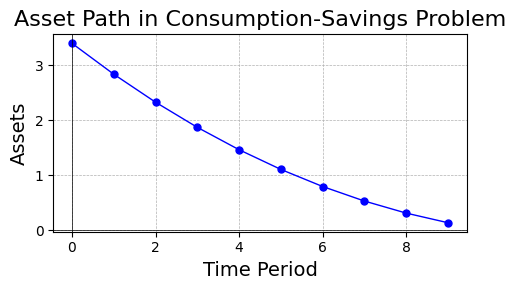

In [11]:
import matplotlib.pyplot as plt

# Plot the asset path
plt.figure(figsize=(5, 3))
plt.plot(a_choices, marker='o', linestyle='-', color='b', markersize=5, linewidth=1)
plt.title('Asset Path in Consumption-Savings Problem', fontsize=16)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Assets', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

**Looks great!**

### A Consumption-Savings Class
Now let's go all in and package the problem nicely. We write a class `ConSavProb` which takes as inputs `beta, r, y, omega` and an initial guess for `a`. It has a `solve` method, which solves for the optimal asset and consumption path.


Packaging the consumption-savings problem into a class, in this case `ConSavProb`, offers several benefits:

1. **Modularity**: By encapsulating the problem within a class, we can organize related variables and functions together. This improves code organization and makes it easier to understand and maintain. It also allows us to reuse the class in different parts of our code or even in other projects.

2. **Abstraction**: Instead of exposing all the inner workings of the consumption-savings problem, we can provide a clean interface through class methods. 

3. **Encapsulation**: Classes allow us to encapsulate data and methods together. This means that the variables and functions related to the consumption-savings problem are contained within the class, reducing the chances of naming conflicts with other parts of the codebase. It also provides a clear boundary for the problem, making it easier to reason about and test.

4. **Code Reusability**: Once we have defined the `ConSavProb` class, we can create multiple instances of it with different input parameters.

5. **Readability**: Using a class can improve the readability of the code. 

Overall, using a class to package the consumption-savings problem provides a clean, modular, and reusable solution that enhances code organization, abstraction, and readability.

In [12]:
class ConSavProb:
    """
    A class representing a consumption-savings problem.

    Attributes:
        beta (float): The discount factor.
        r (float): The interest rate.
        y (float): The income.
        omega (float): The initial endowment.
        asset_path (numpy.ndarray): The path of assets over time.
        a_guess (float): The initial guess for assets.
        euler_error (float): The Euler equation error.
        solved (bool): Indicates whether the problem has been solved.

    Methods:
        update_parameters: Update the parameters of the problem.
        solve_asset_path: Solve the consumption-savings problem and compute the asset path.
        plot_asset_path: Plot the asset path.

    """

    def __init__(self, beta, r, y, omega):
        """
        Initialize a ConSavProb object.

        Args:
            beta (float): The discount factor.
            r (float): The interest rate.
            y (float): The income.
            omega (float): The probability of receiving income.

        """
        self.beta = beta
        self.r = r
        self.y = y
        self.omega = omega
        self.asset_path = None
        self.euler_error = None
        self.solved = False

    def update_parameters(self, beta=None, r=None, y=None, omega=None):
        """
        Update the parameters of the problem.

        Args:
            beta (float, optional): The discount factor.
            r (float, optional): The interest rate.
            y (float, optional): The income.
            omega (float, optional): The probability of receiving income.

        """
        if beta is not None:
            self.beta = beta
        if r is not None:
            self.r = r
        if y is not None:
            self.y = y
        if omega is not None:
            self.omega = omega

    def solve_asset_path(self, a_guess=None):
        """
        Solve the consumption-savings problem and compute the asset path.

        Args:
            a_guess (float): The initial guess for assets.

        """
        if a_guess is None:
            a_guess = np.zeros(len(self.y))
                        
        # solve
        self.asset_path, self.euler_error, _ = newton(self.FOC, a_guess, maxiter=10_000)
        self.solved = True

    def FOC(self, a_choice):
        beta, r, omega, y = self.beta, self.r, self.omega, self.y  # unpack the parameters
        a = np.zeros((1+len(y))) # accommodate initial and terminal condition
        a[0:-1] = a_choice

        F = np.zeros(len(y))
        F[0] = beta*(1+r) * ( 0 + omega * (1+r) - a[0] ) - ( y[0] + a[0]*(1+r) - a[1] )

        for t in range(1, len(F)):
            F[t] = beta*(1+r) * ( y[t-1] + a[t-1] * (1+r) - a[t] ) - ( y[t] + a[t]*(1+r) - a[t+1] )

        return F

    def plot_asset_path(self, figsize=(10, 6)):
        """
        Plot the asset path.

        Args:
            figsize (tuple, optional): The figure size. Defaults to (10, 6).

        """
        if self.solved == True:
            # Plot the asset path
            plt.figure(figsize=figsize)
            plt.plot(np.concatenate([self.asset_path, [0.]]), marker='o', linestyle='-', color='b', markersize=5,
                     linewidth=1)
            plt.title('Asset Path in Consumption-Savings Problem')
            plt.xlabel('Time Period')
            plt.ylabel('Assets')
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)
            plt.axhline(0, color='black', linewidth=0.5)
            plt.axvline(0, color='black', linewidth=0.5)
            plt.tight_layout()
            plt.show()

convergence achieved after 10 iterations


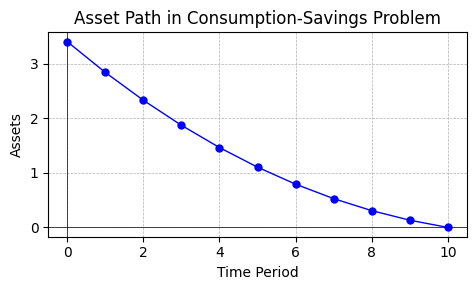

In [13]:
model = ConSavProb(beta, r, y, omega)
model.solve_asset_path(a_guess = np.full(10, 0))

model.plot_asset_path(figsize=(7, 4))


convergence achieved after 42 iterations


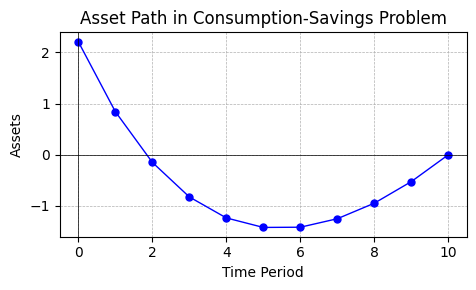

In [14]:
model.update_parameters(beta = 0.85)
model.solve_asset_path(model.asset_path)
model.plot_asset_path(figsize=(7, 4))

What, if income were decreasing from $6$ to $1$ over time, and we had $T=20$ periods instead?

convergence achieved after 11 iterations


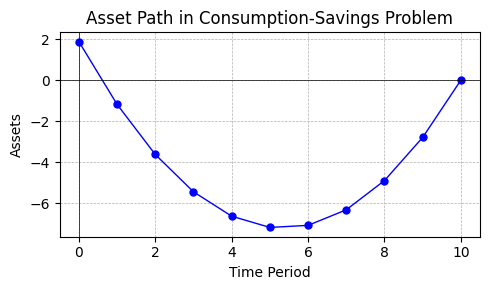

In [15]:
model.update_parameters(y = np.linspace(6,0, 25), beta = 0.85)
model.solve_asset_path()
model.plot_asset_path(figsize=(7, 4))


## 3. The **`scipy` Library for Solving and Optimization**
For more complex equations, including non-linear systems, Python’s `scipy` library provides powerful tools. 

### 1. Basic Usage of `scipy.optimize`

#### Example: Finding the Minimum of a Function



In [16]:
import numpy as np
from scipy.optimize import minimize

# Define the function to minimize
def f(x):
    return x**2 + 5*np.sin(x)

# Initial guess
x0 = 2.0

# Perform the minimization
result = minimize(f, x0)

print("Minimum value:", result.fun)
print("At x =", result.x)

Minimum value: -3.2463942726915196
At x = [-1.11051058]




### 2. Solving a System of Linear Equations

#### Example: Using `scipy.linalg.solve`



In [17]:
import numpy as np
from scipy.linalg import solve

# Coefficient matrix
A = np.array([[3, 2], [1, 2]])

# Right-hand side vector
b = np.array([2, 0])

# Solve the system
x = solve(A, b)

print("Solution:", x)

Solution: [ 1.  -0.5]




### 3. Integration using `scipy.integrate`

#### Example: Numerical Integration with `quad`



In [18]:
from scipy.integrate import quad

# Define the function to integrate
def f(x):
    return np.exp(-x**2)

# Perform the integration
result, error = quad(f, 0, 1)

print("Integral result:", result)
print("Estimated error:", error)

Integral result: 0.7468241328124271
Estimated error: 8.291413475940725e-15




### 4. Interpolation using `scipy.interpolate`

#### Example: 1D Interpolation with `interp1d`



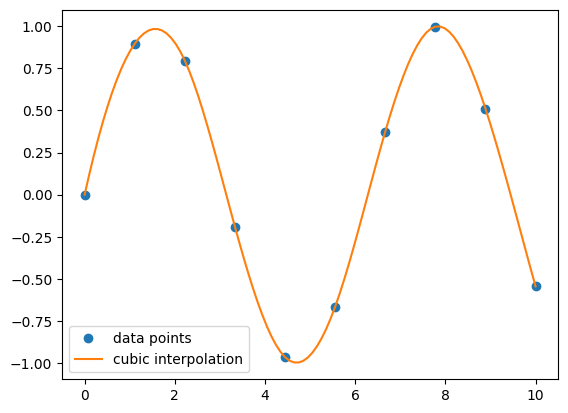

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sample data points
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Create the interpolating function
f = interp1d(x, y, kind='cubic')

# Interpolated values
x_new = np.linspace(0, 10, 100)
y_new = f(x_new)

# Plot the results
plt.plot(x, y, 'o', label='data points')
plt.plot(x_new, y_new, '-', label='cubic interpolation')
plt.legend()
plt.show()



These examples should give you a good starting point for using `scipy` in various scientific and technical computing tasks.